In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sklearn
from sklearn.mixture import GaussianMixture

# import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '3'
# 
# import jax
# import jax.numpy as jnp
# from jax import jit, vmap
# from jax.nn import sigmoid

import time

In C:\Users\Marcus\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Marcus\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Marcus\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Marcus\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Marcus\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

In [4]:
# jax.devices()

In [ ]:
EPS = 1e-10
fontsize=13

In [3]:
import sys
sys.path.append('../')
import adaprobe

SyntaxError: invalid syntax (cavi_offline_spike_and_slab_NOTS_jax.py, line 67)

# Vary number of stimuli

In [5]:
test_Ns = [2, 4, 8, 16, 32, 64]
test_num_targets = [1, 2, 4, 8, 16, 32, 64]
test_Ks = [500]
test_sigmas = [1]
# test_Ks = [500, 1000, 2000, 4000]
# test_sigmas = [1, 3, 5]

In [8]:
fit_options = {
    'iters': 100,
    'num_mc_samples': 20,
    'seed': 1
}

In [9]:
# # # sigma = 1
# # # K = 500
# powers = np.arange(10, 51, 10)
# a = 0.5
# num_repeats = 20


# for sigma in test_sigmas:
#     for K in test_Ks:

#         error_matrix = -1 * np.ones((len(test_Ns), len(test_num_targets), num_repeats))

#         tstart = time.time()
#         for idxn, N in enumerate(test_Ns):
#             for idxs, num_targets in enumerate(test_num_targets):
#                 if num_targets > N:
#                     continue
#                 for rep in range(num_repeats):
#                     print('pop size: %i,  num_targets: %i,  run: %i\t'%(N, num_targets, rep), end='\r')

#                     # generate simulation
#                     phi_1 = np.random.uniform(2.5, 5.5, N)
#                     sim = adaprobe.Simulation3d(N=N, phi_1=phi_1, a=a, sigma=sigma)
#                     sim.simulate_multistim(trials=K, num_targets=np.min([num_targets, N]), powers=powers)

#                     # configure priors
#                     phi_prior = np.c_[0.1 * np.ones(N), 5 * np.ones(N)]
#                     phi_cov_prior = np.array([np.array([[1e-1, 0], [0, 1e0]]) for _ in range(N)])
#                     beta_prior = 7e0 * np.ones(N)
#                     mu_prior = np.zeros(N)

#                     priors = {
#                         'beta': beta_prior,
#                         'mu': mu_prior,
#                         'phi': phi_prior,
#                         'phi_cov': phi_cov_prior
#                     }

#                     stimulus_matrix = np.zeros((N, K))
#                     for n in range(N):
#                         locs = np.where(sim.tars == n)[0]
#                         stimulus_matrix[n, locs] = sim.I[locs]

#                     model = adaprobe.Model(sim.cell_locs, priors=priors)
#                     model.fit(sim.y, stimulus_matrix, fit_options=fit_options, method='cavi_offline_spike_and_slab_NOTS_jax')

#                     error_matrix[idxn, idxs, rep] = np.mean(np.abs(sim.w - model.state['mu'] * model.state['alpha']))
#         tend = time.time()
#         np.save('multispot_mapping_error_matrix_K%i_sigma%.1f_spike_target_relaxed.npy'%(K, sigma), error_matrix)
#         print('\nTotal elapsed time %.2f min'%((tend-tstart)/60))

pop size: 64,  num_targets: 64,  run: 19	
Total elapsed time 14.72 min


In [10]:
fontsize=13

In [ ]:
# for sigma in test_sigmas:
#     for K in test_Ks:
#         error_matrix = np.load('results/multispot_mapping_error_matrix_K%i_sigma%.1f.npy'%(K, sigma))
#         means = np.mean(error_matrix, axis=-1)
#         sdevs = np.std(error_matrix, axis=-1)
        
#         plt.figure(figsize=(12, 4))
#         for N in range(len(test_Ns)):
#             num_pts = len(np.where(means[N] > -1)[0])
#             plt.plot(test_num_targets[:num_pts], means[N][:num_pts], 'o-', color='C%i'%N)
#         #     plt.fill_between(num_targets_all[:num_pts], means[N][:num_pts] - sdevs[N][:num_pts], means[N][:num_pts] + sdevs[N][:num_pts], facecolor='C%i'%N, edgecolor='None', alpha=0.2)
#         plt.xticks(test_num_targets)
#         plt.legend(test_Ns, frameon=False, title='Population size', fontsize=fontsize, title_fontsize=fontsize)
#         plt.ylabel('Mean absolute error\n$|\mathbb{E}[w_n] - w_n|$', fontsize=fontsize)
#         plt.xlabel('Number of simultaneous holograms', fontsize=fontsize)
#         plt.title('Noise: $\sigma$=%.1f\nNumber of trials: K=%i'%(sigma, K))
#         plt.grid(linestyle='--', alpha=0.5)
#         plt.xticks(fontsize=fontsize)
#         plt.yticks(fontsize=fontsize)
#         plt.ylim([-0.25, 10.75])

#         plt.savefig('figs/multi_spot_mapping_offline_err_vs_nstim_sigma%.1f_K%i.png'%(sigma, K), format='png', bbox_inches='tight', dpi=200, facecolor='white')
#         plt.show()
        

In [12]:
means = np.mean(error_matrix, axis=-1)
sdevs = np.std(error_matrix, axis=-1)

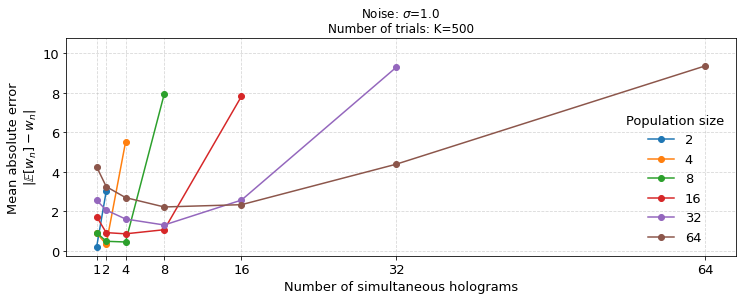

In [15]:
plt.figure(figsize=(12, 4))
for N in range(len(test_Ns)):
    num_pts = len(np.where(means[N] > -1)[0])
    plt.plot(test_num_targets[:num_pts], means[N][:num_pts], 'o-', color='C%i'%N)
#     plt.fill_between(num_targets_all[:num_pts], means[N][:num_pts] - sdevs[N][:num_pts], means[N][:num_pts] + sdevs[N][:num_pts], facecolor='C%i'%N, edgecolor='None', alpha=0.2)
plt.xticks(test_num_targets)
plt.legend(test_Ns, frameon=False, title='Population size', fontsize=fontsize, title_fontsize=fontsize)
plt.ylabel('Mean absolute error\n$|\mathbb{E}[w_n] - w_n|$', fontsize=fontsize)
plt.xlabel('Number of simultaneous holograms', fontsize=fontsize)
plt.title('Noise: $\sigma$=%.1f\nNumber of trials: K=%i'%(sigma, K))
plt.grid(linestyle='--', alpha=0.5)
# for loc in ['top', 'right']:
#     plt.gca().spines[loc].set_visible(False)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.ylim([-0.25, 10.75])

# plt.savefig('figs/multi_spot_mapping_offline_err_vs_nstim_with_relaxed_spike_targeting_sigma%.1f_K%i.png'%(sigma, K), format='png', bbox_inches='tight', dpi=200, facecolor='white')
plt.show()